In [48]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
# Importing the dataset
dataset = pd.read_csv('TrainingDataBinary.csv')
X = dataset.iloc[:, :-13].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 7.36881020e+01  1.30280711e+05 -4.63007190e+01 ...  8.14132788e+00
   2.72100000e-02  0.00000000e+00]
 [ 7.37339390e+01  1.30305784e+05 -4.62548830e+01 ...  8.16275526e+00
   2.66630000e-02  0.00000000e+00]
 [ 7.40834430e+01  1.30581590e+05 -4.58996490e+01 ...  8.13529228e+00
   2.65950000e-02  0.00000000e+00]
 ...
 [ 1.16384917e+02  1.31734961e+05 -3.58671600e+00 ...  1.00440535e+01
   3.89990000e-02  0.00000000e+00]
 [ 1.11125164e+02  1.30506370e+05 -8.84646800e+00 ...  7.80294641e+00
   8.26580000e-02  0.00000000e+00]
 [ 1.10878793e+02  1.30481297e+05 -9.09284000e+00 ...  7.80357825e+00
   8.03250000e-02  0.00000000e+00]]
[0 0 0 ... 0 0 0]


In [50]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-1.67762042e+02  1.30381004e+05  7.22843550e+01 ...  7.10767529e+00
   9.83100000e-02  0.00000000e+00]
 [ 7.00269020e+01  1.31258568e+05 -4.99332720e+01 ...  8.47530770e+00
   6.79420000e-02  0.00000000e+00]
 [-1.29981205e+02  1.32336719e+05  1.10053733e+02 ...  1.08975101e+01
   9.41900000e-03  0.00000000e+00]
 ...
 [-1.43245178e+02  1.31985693e+05  9.67783010e+01 ...  1.18473310e+01
   1.35850000e-02  0.00000000e+00]
 [-2.76337540e+01  1.31409008e+05 -1.47616846e+02 ...  9.12269160e+00
   2.20680000e-02  0.00000000e+00]
 [-1.74459919e+02  1.30681883e+05  6.55807490e+01 ...  7.22021360e+00
   9.47530000e-02  0.00000000e+00]]
[0 0 0 ... 0 0 0]
[[ 1.23902123e+02  1.32361792e+05  3.92476100e+00 ...  1.49121787e+01
  -2.44660000e-02  0.00000000e+00]
 [ 1.41119505e+02  1.30982762e+05  2.11249540e+01 ...  7.70668412e+00
   8.89180000e-02  0.00000000e+00]
 [-1.23157278e+02  1.32186279e+05  1.16849013e+02 ...  1.20703542e+01
  -1.01310000e-02  0.00000000e+00]
 ...
 [-2.98224530e+01  7.81032

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)


[[-1.54254121e+00 -1.58800321e-01  7.37811172e-01 ... -5.80165459e-01
   4.92401281e-01 -3.71172443e-02]
 [ 8.30625596e-01 -5.65007024e-03 -3.95134701e-01 ... -3.70313383e-01
   3.06402805e-01 -3.71172443e-02]
 [-1.16548319e+00  1.82505940e-01  1.08792974e+00 ...  1.35389184e-03
  -5.20399248e-02 -3.71172443e-02]
 ...
 [-1.29785949e+00  1.21245840e-01  9.64867741e-01 ...  1.47096179e-01
  -2.65239326e-02 -3.71172443e-02]
 [-1.44041364e-01  2.06042535e-02 -1.30065222e+00 ... -2.70977587e-01
   2.54328994e-02 -3.71172443e-02]
 [-1.60938696e+00 -1.06291674e-01  6.75669377e-01 ... -5.62897371e-01
   4.70615303e-01 -3.71172443e-02]]
[[ 1.36830781  0.18688165  0.10412418 ...  0.61737215 -0.25957939
  -0.03711724]
 [ 1.54013968 -0.05378301  0.26356835 ... -0.48825242  0.43487699
  -0.03711724]
 [-1.09737945  0.1562516   1.15092135 ...  0.18131729 -0.17178012
  -0.03711724]
 ...
 [-0.16588488 -9.28217904 -1.27000622 ... -1.48970802  9.17284874
  -0.03711724]
 [ 0.90867901  0.02060425 -0.322795

In [52]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [53]:
# Training accuracy and F1 Score to check the accuracy of model on training set
from sklearn.metrics import f1_score, accuracy_score
y_pred_training=classifier.predict(X_train)
accuracyscore=accuracy_score(y_train, y_pred_training)
print('Accuracy Score on training set is '+ str(accuracyscore))
print('F1 score of Training set is ' + str(f1_score(y_train, y_pred_training, average='macro')))


Accuracy Score on training set is 1.0
F1 score of Training set is 1.0


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]
[[448   3]
 [  6 443]]
Accuracy Score on testing set is 0.99
F1 score of Testing set is 0.9899996913484985


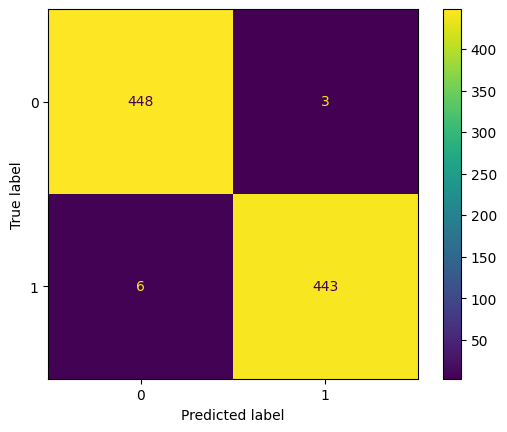

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Simple confusion Matrix and accuracy on test set
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
AS_test = accuracy_score(y_test, y_pred)
print('Accuracy Score on testing set is '+ str(AS_test))

#calculating the F1 score of test set 
from sklearn.metrics import f1_score
print('F1 score of Testing set is ' + str(f1_score(y_test, y_pred, average='macro')))

#Confusion Matrix Diagram
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


In [55]:
#Predicting the results for actual testing data (TestingDataBinary.CSV) 
new_data = pd.read_csv('TestingDataBinary.csv',header=None)
new_data1 = new_data.iloc[:, :-12].values
new_data1 = sc.transform(new_data1)
print(new_data1)
predictions = classifier.predict(new_data1)
print(predictions)
new_data['predictions'] = predictions
new_data.to_csv('TestingResultsBinary.csv', index=False, header=False) # creating a new file with input parameters and predicted results



[[ 0.25268725  0.09061579 -0.93199734 ... -0.104965    0.09437998
  -0.03711724]
 [ 0.25200107  0.09061579 -0.9326878  ... -0.10709066  0.08889214
  -0.03711724]
 [ 0.25194389  0.09061579 -0.93274091 ... -0.10624442  0.09396961
  -0.03711724]
 ...
 [-1.58497025  0.2175117   0.69834848 ...  0.57809781 -0.22618075
  -0.03711724]
 [-1.58559925  0.1956331   0.69781735 ...  0.57624584 -0.22883892
  -0.03711724]
 [-1.58651416  0.18688165  0.69691443 ...  0.57469799 -0.22078479
  -0.03711724]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
